# Gold Price Prediction

# ARIMA MODEL

In [13]:
# Import libraries
from pandas import read_csv
from matplotlib import pyplot
from numpy import sqrt
import warnings
warnings.filterwarnings('ignore')
import itertools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [14]:
series = read_csv('Gold_data.csv', header=0, index_col=0, parse_dates=True)

In [15]:
series.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [16]:
# Resetting index 
series1 = series.reset_index()
series1.head()

,date,price
0,2016-01-01,2252.60
1,2016-01-02,2454.50
2,2016-01-03,2708.10
3,2016-01-04,2577.80
4,2016-01-05,2597.75


<AxesSubplot:xlabel='date'>

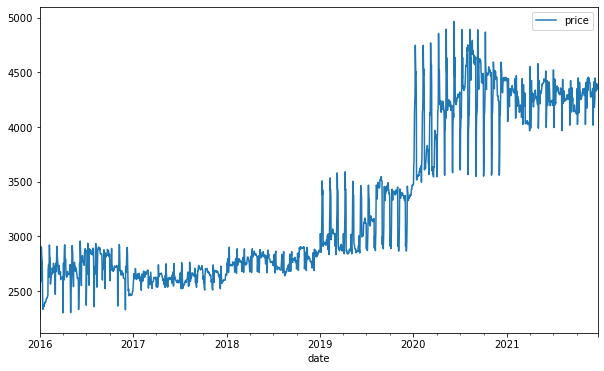

In [17]:
# line plot of time series
from pandas import read_csv
from matplotlib import pyplot
series.plot()


In [18]:
# separate out a validation dataset (90%-training data and 10% test data)
split_point = len(series) - 437
dataset, validation = series[0:split_point], series[split_point:]
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))
dataset.to_csv('dataset.csv', header=False)
validation.to_csv('validation.csv', header=False)

Dataset 1745, Validation 437


**Persistence/ Base model**


In [19]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt
# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.80)
train, test = X[0:train_size], X[train_size:]

In [20]:
X

array([2252.6, 2454.5, 2708.1, ..., 4869.1, 4586.4, 4519.3], dtype=float32)

In [21]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.1f, Observed =%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=3421.0, Observed =3390.300
>Predicted=3390.3, Observed =3388.400
>Predicted=3388.4, Observed =3403.000
>Predicted=3403.0, Observed =3450.800
>Predicted=3450.8, Observed =2909.700
>Predicted=2909.7, Observed =2992.500
>Predicted=2992.5, Observed =2895.800
>Predicted=2895.8, Observed =2864.000
>Predicted=2864.0, Observed =2886.800
>Predicted=2886.8, Observed =2955.500
>Predicted=2955.5, Observed =3092.900
>Predicted=3092.9, Observed =3414.800
>Predicted=3414.8, Observed =3433.800
>Predicted=3433.8, Observed =3385.000
>Predicted=3385.0, Observed =3347.700
>Predicted=3347.7, Observed =3351.400
>Predicted=3351.4, Observed =3390.800
>Predicted=3390.8, Observed =3399.300
>Predicted=3399.3, Observed =3373.200
>Predicted=3373.2, Observed =3376.300
>Predicted=3376.3, Observed =3376.300
>Predicted=3376.3, Observed =3397.400
>Predicted=3397.4, Observed =3397.200
>Predicted=3397.2, Observed =3393.100
>Predicted=3393.1, Observed =3374.500
>Predicted=3374.5, Observed =3370.200
>Predicted=3

**ARIMA Hyperparameter**

In [22]:
# grid search ARIMA parameters for a time series
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.80)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse


**Grid search for p,d,q values**

In [23]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except Exception as e :
                    print(e)
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [24]:
# load dataser
train= pd.read_excel('dataset.xlsx', header = None , index_col =0, parse_dates = True, squeeze =True)
# evaluate parameters
p_values = range(0,3)
d_values = range(0,3)
q_values = range(0,3)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=1134.217
ARIMA(0, 0, 1) RMSE=610.207
ARIMA(0, 0, 2) RMSE=393.925
ARIMA(0, 1, 0) RMSE=119.351
ARIMA(0, 1, 1) RMSE=119.436
ARIMA(0, 1, 2) RMSE=114.989
ARIMA(0, 2, 0) RMSE=169.202
ARIMA(0, 2, 1) RMSE=119.447
ARIMA(0, 2, 2) RMSE=119.532
ARIMA(1, 0, 0) RMSE=120.016
ARIMA(1, 0, 1) RMSE=120.100
ARIMA(1, 0, 2) RMSE=115.743
ARIMA(1, 1, 0) RMSE=119.415
ARIMA(1, 1, 1) RMSE=111.303
ARIMA(1, 1, 2) RMSE=109.768
ARIMA(1, 2, 0) RMSE=160.312
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
The computed initial MA coefficients are not invertible
You should induce invertibility, choose a different model order, or you can
pass your own start_params.
ARIMA(2, 0, 0) RMSE=120.079
ARIMA(2, 0, 1) RMSE=113.271
ARIMA(2, 0, 2) RMSE=109.579
ARIMA(2, 1, 0) RMSE=115.616
ARIMA(2, 1, 1) RMSE=110.065
The computed initial MA coefficients are not invertible
You should induce invertibility, ch

**Build model based on the optimized values**



In [1]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load data
train = read_csv('dataset.csv', index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')

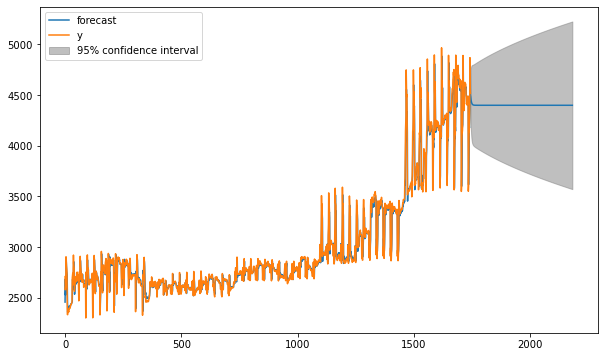

In [29]:
# fit model
model = ARIMA(X, order=(2, 0, 2))
model_fit = model.fit()
forecast=model_fit.forecast(steps=437)[0]
model_fit.plot_predict(2, 2182)
plt.show()

In [30]:
#Error on the test data
val=pd.read_csv('validation.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

186.50444982478058

In [31]:
from sklearn.metrics import mean_absolute_percentage_error
MAPE = mean_absolute_percentage_error(val[1], forecast)
MAPE

0.03407375632154526